In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Membaca dua dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\dailyIntensities_merged.csv')
# Menggabungkan dua dataset menjadi satu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [3]:
df.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [46]:
df[nums].describe()

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,995.642162,192.857297,13.654054,21.222703,0.000995,3.340238,0.569946,1.493178
std,296.141914,108.913272,20.060064,32.944991,0.003676,2.038406,0.885610,2.639813
min,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,127.000000,0.000000,0.000000,0.000000,1.950000,0.000000,0.000000
50%,1060.000000,199.000000,7.000000,4.000000,0.000000,3.360000,0.250000,0.220000
75%,1234.000000,263.000000,19.000000,32.000000,0.000000,4.790000,0.800000,2.030000
max,1440.000000,518.000000,143.000000,210.000000,0.020000,10.710000,6.480000,21.920000


hasil statistik deskriptif diatas :
* SedentaryMinutes: Tidak Beraktivitas selama beberapa memiliki nilai Q1 sebesar 729 dan nilai max sebesar 1440
* SedentaryActiveDistance: 

In [5]:
df_obj = df[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 
             'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 
             'ModeratelyActiveDistance', 'VeryActiveDistance']].astype(str)
#
statistik_deskriptif = df_obj.describe()
statistik_deskriptif

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,940,940,940,940,940,940,940,940
unique,549,335,81,122,9,491,211,333
top,1440,0,0,0,0.0,0.0,0.0,0.0
freq,79,84,384,409,858,85,386,413


### Descriptive Analysis Summary

1. *Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?*<br> semua tipe data sudah sesuai dengan dataset dailyintensity 

2. *Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?*<br>
   tidak terdapat nilai null pada kolom dataset dailyintensity

3. *Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)*<br>
  pada kolom 'SedentaryMinutes' memiliki nilai unique yang tinggi sebesar 549 , sedangkan 'SedentaryActiveDistance' memiliki nilai terendah sebesar 9 dibandingkan dengan kolom lainnya dan begitu sebaliknya pada freq kolom 'SedentaryMinutes' memiliki nilai terendah  sebesar 79 , sedangkan 'SedentaryActiveDistance'memiliki nilai tertinggi sebesar 858

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Id','ActivityDay']
nums = ['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes','SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']

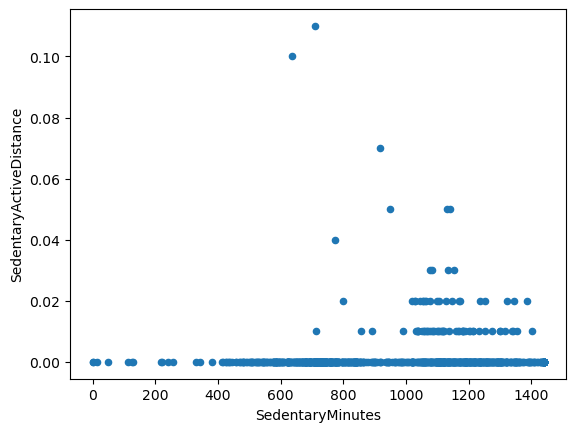

In [7]:
df.plot(x ='SedentaryMinutes' , y='SedentaryActiveDistance', kind= 'scatter');

In [8]:
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom SedentaryMinutes:
SedentaryMinutes
1440    79
1182     7
692      6
1112     5
1131     5
        ..
1225     1
855      1
531      1
950      1
770      1
Name: count, Length: 549, dtype: int64

Value count kolom LightlyActiveMinutes:
LightlyActiveMinutes
0      84
206    12
258    10
195     9
214     8
       ..
173     1
278     1
31      1
38      1
218     1
Name: count, Length: 335, dtype: int64

Value count kolom FairlyActiveMinutes:
FairlyActiveMinutes
0     384
8      36
6      23
5      23
16     22
     ... 
92      1
98      1
83      1
94      1
91      1
Name: count, Length: 81, dtype: int64

Value count kolom VeryActiveMinutes:
VeryActiveMinutes
0      409
1       23
2       18
3       16
8       15
      ... 
84       1
95       1
119      1
132      1
88       1
Name: count, Length: 122, dtype: int64

Value count kolom SedentaryActiveDistance:
SedentaryActiveDistance
0.00    858
0.01     50
0.02     21
0.03      4
0.05      3
0.07      1
0.04      1


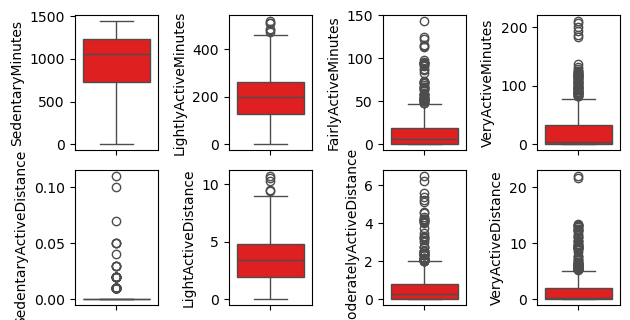

In [35]:
for i in range(0, len(nums)):
    plt.subplot( 3, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

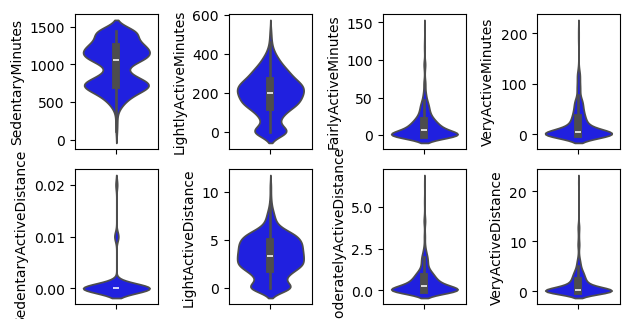

In [65]:
for i in range(0, len(nums)):
    plt.subplot(3,4 , i+1)
    sns.violinplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [40]:
from scipy import stats

In [42]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['SedentaryMinutes',	'SedentaryActiveDistance']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 940
Jumlah baris setelah memfilter outlier: 925


## apa saja atribute yang terdapat pada dataset dailyIntensity
 * Id : Identitas Diri Pengguna
 * ActivityDay : Berapa hari Aktivitas dilakukan  
 * SedentaryMinutes	: jumlah waktu tidak beraktivitas dalam menit 
 * LightlyActiveMinute : Jumlah menit yang dihabiskan untuk aktivitas ringan.
 * FairlyActiveMinutes : jumlah menit yang dihabiskan untuk aktivitas cukup aktif. 
 * VeryActiveMinutes : jumlah menit yang dihabiskan untuk aktivitas sangat aktif
 * SedentaryActiveDistance : Jarak yang ditempuh saat beraktivitas.
 * LightActiveDistance	: jumlah jarak yang ditempuh saat aktivitas ringan.
 * ModeratelyActiveDistance	: jumlah jarak yang ditempuh saat aktivitas cukup ringan.
 * VeryActiveDistance : jumlah jarak yang ditempuh saat aktivitas sangat berat.